In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import requests
from tqdm import tqdm

class DSpritesDataset(Dataset):
    def __init__(self, npz_path, subset_size=50000):
        # Download dataset if it doesn't exist
        if not os.path.exists(npz_path):
            print("Downloading dSprites dataset...")
            url = 'https://github.com/deepmind/dsprites-dataset/raw/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
            response = requests.get(url)
            with open(npz_path, 'wb') as f:
                f.write(response.content)
            print("Download complete!")

        # Load dataset with memory mapping
        dataset = np.load(npz_path, allow_pickle=True, encoding='latin1', mmap_mode='r')

        # Take only a subset of the data
        self.total_size = len(dataset['imgs'])
        self.subset_size = min(subset_size, self.total_size)
        self.indices = np.random.choice(self.total_size, self.subset_size, replace=False)

        # Store the memory-mapped arrays
        self.images = dataset['imgs']
        self.latents_values = dataset['latents_values']  # Contains the ground truth factors

    def __len__(self):
        return self.subset_size

    def __getitem__(self, idx):
        # Get the actual index from our subset
        actual_idx = self.indices[idx]
        # Load single image and convert to float32
        img = self.images[actual_idx].astype(np.float32)
        # Add channel dimension
        img = img[None, :, :]
        # Get the corresponding latent factors (excluding color channel)
        factors = self.latents_values[actual_idx][1:]  # [shape, scale, orientation, posX, posY]
        return torch.from_numpy(img), torch.from_numpy(factors.astype(np.float32))

def create_data_loader(batch_size=32):
    try:
        # Free up memory
        import gc
        gc.collect()

        # Create dataset with smaller subset
        npz_path = 'dsprites.npz'
        dataset = DSpritesDataset(npz_path, subset_size=50000)

        # Create dataloader with memory-efficient settings
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=False
        )

        print(f"Dataset subset size: {len(dataset)}")
        print(f"Number of batches: {len(dataloader)}")

        return dataset, dataloader  # Return both dataset and dataloader

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None, None

if __name__ == "__main__":
    dataset, loader = create_data_loader(batch_size=32)

    if loader is not None:
        for batch, factors in loader:
            print(f"Batch shape: {batch.shape}")
            print(f"Factors shape: {factors.shape}")
            print(f"Batch memory: {batch.element_size() * batch.nelement() / 1024 / 1024:.2f} MB")
            break

        sample_img, sample_factors = dataset[0]
        print(f"Sample image shape: {sample_img.shape}")
        print(f"Sample factors shape: {sample_factors.shape}")

Dataset subset size: 50000
Number of batches: 1563
Batch shape: torch.Size([32, 1, 64, 64])
Factors shape: torch.Size([32, 5])
Batch memory: 0.50 MB
Sample image shape: torch.Size([1, 64, 64])
Sample factors shape: torch.Size([5])



Training model with beta = 0.5


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:0.5
Total Loss: 141.7461, Recon Loss: 128.3732, KL Loss: 26.7459


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:0.5
Total Loss: 71.5780, Recon Loss: 56.9256, KL Loss: 29.3049


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:0.5
Total Loss: 58.8616, Recon Loss: 43.3630, KL Loss: 30.9971


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:0.5
Total Loss: 54.2118, Recon Loss: 38.4637, KL Loss: 31.4963


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:0.5
Total Loss: 51.7918, Recon Loss: 35.9523, KL Loss: 31.6790


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:0.5
Total Loss: 50.2541, Recon Loss: 34.3186, KL Loss: 31.8710


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:0.5
Total Loss: 48.7990, Recon Loss: 32.8185, KL Loss: 31.9610


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:0.5
Total Loss: 47.6174, Recon Loss: 31.5676, KL Loss: 32.0994


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:0.5
Total Loss: 46.3081, Recon Loss: 30.1678, KL Loss: 32.2806


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:0.5
Total Loss: 45.2485, Recon Loss: 29.0539, KL Loss: 32.3891

Training model with beta = 1


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:1
Total Loss: 185.5151, Recon Loss: 165.9393, KL Loss: 19.5758


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:1
Total Loss: 91.5334, Recon Loss: 69.7395, KL Loss: 21.7939


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:1
Total Loss: 79.1599, Recon Loss: 55.2258, KL Loss: 23.9341


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:1
Total Loss: 72.3463, Recon Loss: 47.3465, KL Loss: 24.9998


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:1
Total Loss: 68.8895, Recon Loss: 43.3856, KL Loss: 25.5039


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:1
Total Loss: 66.7604, Recon Loss: 41.0258, KL Loss: 25.7346


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:1
Total Loss: 65.1316, Recon Loss: 39.1979, KL Loss: 25.9338


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:1
Total Loss: 63.6611, Recon Loss: 37.5482, KL Loss: 26.1129


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:1
Total Loss: 62.5890, Recon Loss: 36.3240, KL Loss: 26.2651


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:1
Total Loss: 61.0570, Recon Loss: 34.5674, KL Loss: 26.4896

Training model with beta = 2.5


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:2.5
Total Loss: 189.0910, Recon Loss: 153.7088, KL Loss: 14.1529


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:2.5
Total Loss: 118.0206, Recon Loss: 79.0567, KL Loss: 15.5856


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:2.5
Total Loss: 113.1779, Recon Loss: 72.7019, KL Loss: 16.1904


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:2.5
Total Loss: 107.4640, Recon Loss: 63.9146, KL Loss: 17.4198


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:2.5
Total Loss: 102.3900, Recon Loss: 56.6186, KL Loss: 18.3085


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:2.5
Total Loss: 99.9099, Recon Loss: 53.4905, KL Loss: 18.5678


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:2.5
Total Loss: 98.3772, Recon Loss: 51.5651, KL Loss: 18.7248


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:2.5
Total Loss: 97.0965, Recon Loss: 50.1160, KL Loss: 18.7922


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:2.5
Total Loss: 95.9450, Recon Loss: 48.8590, KL Loss: 18.8344


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:2.5
Total Loss: 95.0858, Recon Loss: 47.8312, KL Loss: 18.9018

Training model with beta = 5


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:5
Total Loss: 262.6744, Recon Loss: 217.1701, KL Loss: 9.1009


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:5
Total Loss: 155.5105, Recon Loss: 98.7746, KL Loss: 11.3472


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:5
Total Loss: 150.0308, Recon Loss: 92.7388, KL Loss: 11.4584


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:5
Total Loss: 147.1601, Recon Loss: 89.9727, KL Loss: 11.4375


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:5
Total Loss: 144.6771, Recon Loss: 87.6704, KL Loss: 11.4013


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:5
Total Loss: 142.5367, Recon Loss: 85.6577, KL Loss: 11.3758


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:5
Total Loss: 141.2077, Recon Loss: 84.1672, KL Loss: 11.4081


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:5
Total Loss: 139.8787, Recon Loss: 82.9356, KL Loss: 11.3886


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:5
Total Loss: 138.7418, Recon Loss: 81.8953, KL Loss: 11.3693


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:5
Total Loss: 137.8609, Recon Loss: 80.9786, KL Loss: 11.3765

Training model with beta = 7.5


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:7.5
Total Loss: 272.0913, Recon Loss: 213.3973, KL Loss: 7.8259


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:7.5
Total Loss: 182.9365, Recon Loss: 113.1075, KL Loss: 9.3105


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:7.5
Total Loss: 176.5505, Recon Loss: 104.8354, KL Loss: 9.5620


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:7.5
Total Loss: 173.8260, Recon Loss: 101.6822, KL Loss: 9.6192


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:7.5
Total Loss: 171.5022, Recon Loss: 99.3996, KL Loss: 9.6137


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:7.5
Total Loss: 169.8540, Recon Loss: 97.6947, KL Loss: 9.6212


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:7.5
Total Loss: 168.1034, Recon Loss: 95.7887, KL Loss: 9.6420


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:7.5
Total Loss: 166.9950, Recon Loss: 94.8715, KL Loss: 9.6165


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:7.5
Total Loss: 166.1245, Recon Loss: 93.7254, KL Loss: 9.6532


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:7.5
Total Loss: 165.0560, Recon Loss: 92.7763, KL Loss: 9.6373

Training model with beta = 10


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:10
Total Loss: 271.1091, Recon Loss: 201.4600, KL Loss: 6.9649


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:10
Total Loss: 203.2936, Recon Loss: 124.7890, KL Loss: 7.8505


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:10
Total Loss: 198.5566, Recon Loss: 119.6563, KL Loss: 7.8900


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:10
Total Loss: 195.6475, Recon Loss: 116.6382, KL Loss: 7.9009


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:10
Total Loss: 193.7042, Recon Loss: 114.4422, KL Loss: 7.9262


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:10
Total Loss: 191.4901, Recon Loss: 111.0992, KL Loss: 8.0391


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:10
Total Loss: 189.8850, Recon Loss: 107.8732, KL Loss: 8.2012


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:10
Total Loss: 188.4365, Recon Loss: 105.9745, KL Loss: 8.2462


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:10
Total Loss: 187.7403, Recon Loss: 104.6795, KL Loss: 8.3061


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:10
Total Loss: 186.9878, Recon Loss: 103.7211, KL Loss: 8.3267

Training model with beta = 50


Epoch 1/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[1/10] Beta:50
Total Loss: 589.9590, Recon Loss: 589.8425, KL Loss: 0.0023


Epoch 2/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[2/10] Beta:50
Total Loss: 567.2186, Recon Loss: 567.2097, KL Loss: 0.0002


Epoch 3/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[3/10] Beta:50
Total Loss: 566.2401, Recon Loss: 566.2361, KL Loss: 0.0001


Epoch 4/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[4/10] Beta:50
Total Loss: 565.8961, Recon Loss: 565.8931, KL Loss: 0.0001


Epoch 5/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[5/10] Beta:50
Total Loss: 565.4895, Recon Loss: 565.4866, KL Loss: 0.0001


Epoch 6/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[6/10] Beta:50
Total Loss: 565.3836, Recon Loss: 565.3809, KL Loss: 0.0001


Epoch 7/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[7/10] Beta:50
Total Loss: 565.1731, Recon Loss: 565.1707, KL Loss: 0.0000


Epoch 8/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[8/10] Beta:50
Total Loss: 565.1819, Recon Loss: 565.1796, KL Loss: 0.0000


Epoch 9/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[9/10] Beta:50
Total Loss: 565.0012, Recon Loss: 564.9992, KL Loss: 0.0000


Epoch 10/10:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch[10/10] Beta:50
Total Loss: 564.9337, Recon Loss: 564.9316, KL Loss: 0.0000


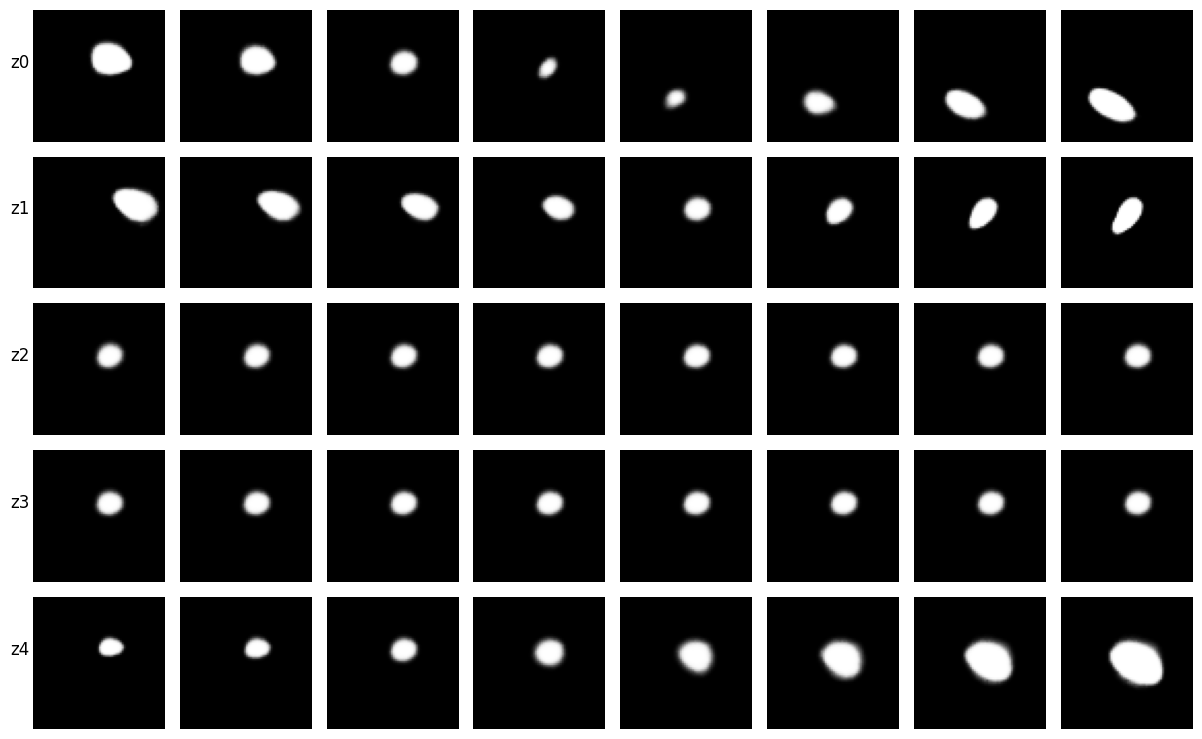

In [2]:
z_dim = 10

class Encoder(nn.Module):
    def __init__(self, z_dim=10):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 4, 2, 1)  # 64->32
        self.conv2 = nn.Conv2d(32, 64, 4, 2, 1) # 32->16
        self.conv3 = nn.Conv2d(64, 128, 4, 2, 1)# 16->8
        self.conv4 = nn.Conv2d(128, 256, 4, 2, 1)#8->4
        self.fc_mu = nn.Linear(256*4*4, z_dim)
        self.fc_logvar = nn.Linear(256*4*4, z_dim)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = x.view(x.size(0), -1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, z_dim=10):
        super(Decoder, self).__init__()
        self.fc = nn.Linear(z_dim, 256*4*4)
        self.deconv1 = nn.ConvTranspose2d(256,128,4,2,1)
        self.deconv2 = nn.ConvTranspose2d(128,64,4,2,1)
        self.deconv3 = nn.ConvTranspose2d(64,32,4,2,1)
        self.deconv4 = nn.ConvTranspose2d(32,1,4,2,1)

    def forward(self, z):
        z = F.relu(self.fc(z))
        z = z.view(z.size(0),256,4,4)
        z = F.relu(self.deconv1(z))
        z = F.relu(self.deconv2(z))
        z = F.relu(self.deconv3(z))
        z = torch.sigmoid(self.deconv4(z))  # output in [0,1]
        return z

class BetaVAE(nn.Module):
    def __init__(self, z_dim=10):
        super(BetaVAE, self).__init__()
        self.encoder = Encoder(z_dim)
        self.decoder = Decoder(z_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def vae_loss(recon_x, x, mu, logvar, beta=1.0):
    batch_size = x.size(0)
    # Normalize both terms by batch size
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum') / batch_size
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / batch_size
    return BCE + beta * KLD

def train_vae(model, dataloader, beta=1.0, epochs=10, lr=1e-3):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()

    # Track losses for plotting
    train_losses = []
    recon_losses = []
    kl_losses = []

    from tqdm.notebook import tqdm

    for epoch in range(epochs):
        total_loss = 0
        total_recon = 0
        total_kl = 0

        # Add progress bar
        pbar = tqdm(dataloader, desc=f'Epoch {epoch+1}/{epochs}')
        for imgs, _ in pbar:
            imgs = imgs.to(device)
            optimizer.zero_grad()

            recon, mu, logvar = model(imgs)
            # Calculate losses separately
            recon_loss = F.binary_cross_entropy(recon, imgs, reduction='sum') / imgs.size(0)
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp()) / imgs.size(0)
            loss = recon_loss + beta * kl_loss

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_recon += recon_loss.item()
            total_kl += kl_loss.item()

            # Update progress bar
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        avg_loss = total_loss/len(dataloader)
        avg_recon = total_recon/len(dataloader)
        avg_kl = total_kl/len(dataloader)

        train_losses.append(avg_loss)
        recon_losses.append(avg_recon)
        kl_losses.append(avg_kl)

        print(f"Epoch[{epoch+1}/{epochs}] Beta:{beta}")
        print(f"Total Loss: {avg_loss:.4f}, Recon Loss: {avg_recon:.4f}, KL Loss: {avg_kl:.4f}")

    return train_losses, recon_losses, kl_losses

# Train multiple models with different beta values
# Train models with different betas

import matplotlib.pyplot as plt

def visualize_latent_traversal(model, seed_img, dim_range=(-3, 3), steps=8, num_dims=5):
    model.eval()
    with torch.no_grad():
        x = seed_img.unsqueeze(0).to(device)
        mu, logvar = model.encoder(x)
        z = mu[0].clone().detach().cpu().numpy()

        vals = np.linspace(dim_range[0], dim_range[1], steps)
        fig, axes = plt.subplots(num_dims, steps, figsize=(steps*1.5, num_dims*1.5))

        for dim in range(num_dims):
            for i, val in enumerate(vals):
                z_mod = z.copy()
                z_mod[dim] = val
                z_mod = torch.tensor(z_mod, dtype=torch.float32, device=device).unsqueeze(0)
                recon = model.decoder(z_mod).cpu().squeeze().numpy()
                axes[dim, i].imshow(recon, cmap='gray')
                axes[dim, i].axis('off')

                if i == 0:
                    axes[dim, i].set_title(f'z{dim}', x=-0.1, y=0.5)

        plt.tight_layout()
        plt.show()

betas = [0.5, 1, 2.5, 5, 7.5, 10, 50]
trained_models = {}
training_history = {}

# 4. Train models for each beta value
for b in betas:
    print(f"\nTraining model with beta = {b}")
    vae = BetaVAE(z_dim=z_dim)
    losses = train_vae(vae, loader, beta=b, epochs=10, lr=1e-3)
    trained_models[b] = vae
    training_history[b] = losses

# 5. Visualize results for a specific beta value (e.g., beta=5)
sample_img, _ = dataset[0]
visualize_latent_traversal(trained_models[5], sample_img, dim_range=(-3, 3), steps=8, num_dims=5)

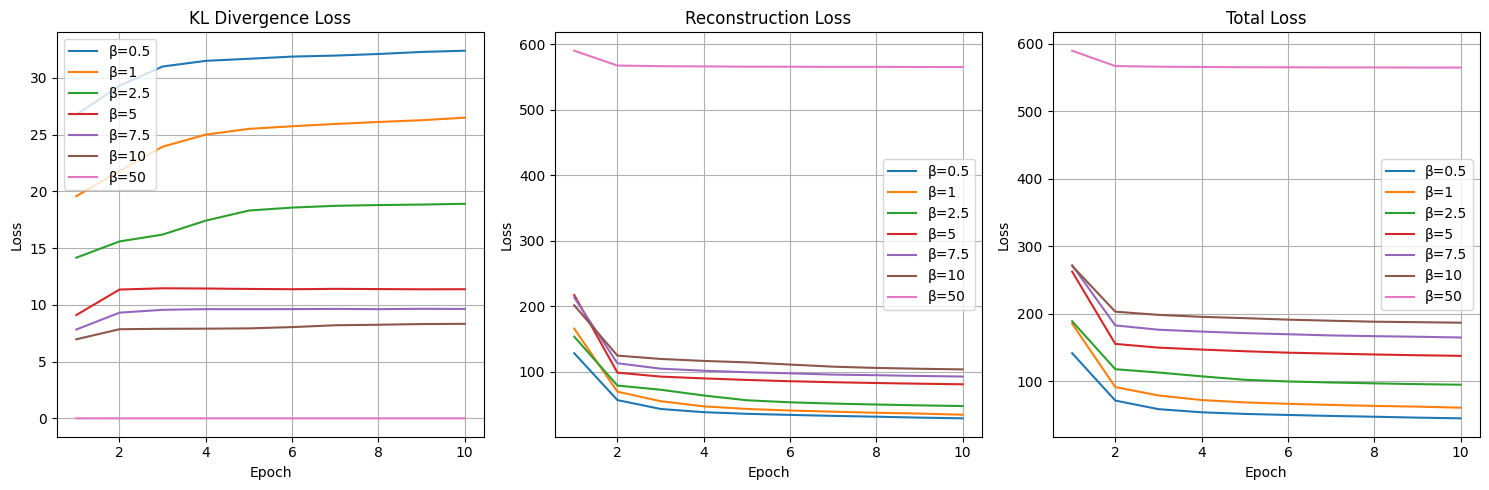

In [3]:
def plot_training_losses(training_history, betas):
    plt.figure(figsize=(15, 5))
    epochs = range(1, 11)  # 10 epochs

    # Plot 1: KL Loss
    plt.subplot(1, 3, 1)
    for beta in betas:
        plt.plot(epochs, training_history[beta][2], label=f'β={beta}')  # kl_losses is index 2
    plt.title('KL Divergence Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 2: Reconstruction Loss
    plt.subplot(1, 3, 2)
    for beta in betas:
        plt.plot(epochs, training_history[beta][1], label=f'β={beta}')  # recon_losses is index 1
    plt.title('Reconstruction Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot 3: Total Loss
    plt.subplot(1, 3, 3)
    for beta in betas:
        plt.plot(epochs, training_history[beta][0], label=f'β={beta}')  # train_losses is index 0
    plt.title('Total Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_losses(training_history, betas)

Computing metrics for different beta values:   0%|          | 0/7 [00:00<?, ?it/s]


Computing metrics for β = 0.5



Computing metrics for different beta values:  14%|█▍        | 1/7 [00:06<00:37,  6.29s/it]


Computing metrics for β = 1



Computing metrics for different beta values:  29%|██▊       | 2/7 [00:13<00:33,  6.68s/it]


Computing metrics for β = 2.5



Computing metrics for different beta values:  43%|████▎     | 3/7 [00:19<00:26,  6.63s/it]


Computing metrics for β = 5



Computing metrics for different beta values:  57%|█████▋    | 4/7 [00:26<00:20,  6.71s/it]


Computing metrics for β = 7.5



Computing metrics for different beta values:  71%|███████▏  | 5/7 [00:33<00:13,  6.66s/it]


Computing metrics for β = 10



Computing metrics for different beta values:  86%|████████▌ | 6/7 [00:39<00:06,  6.69s/it]


Computing metrics for β = 50



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
Computing metrics for different beta values: 100%|██████████| 7/7 [00:48<00:00,  6.96s/it]


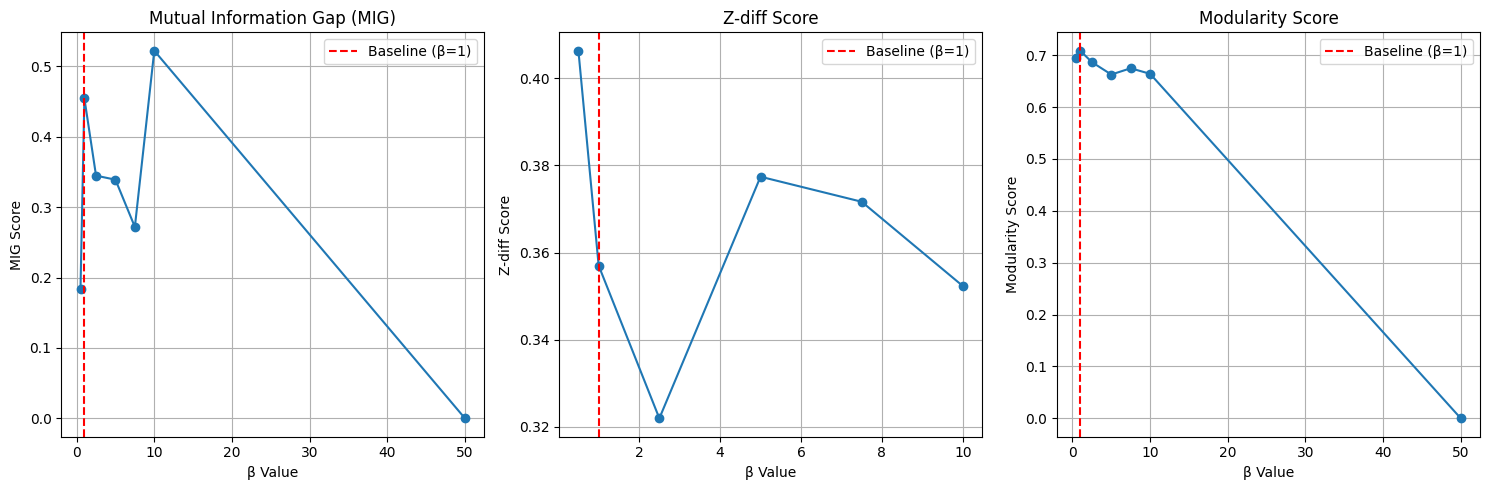


Baseline (β=1) correlation matrices:


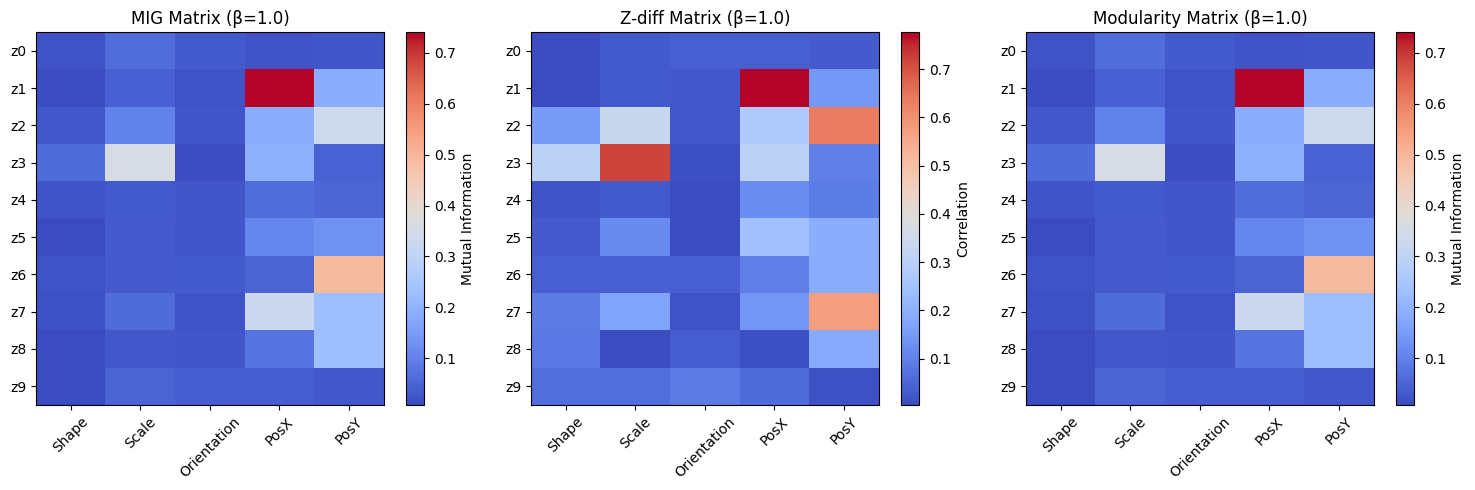


Best performing model (β=10) correlation matrices:


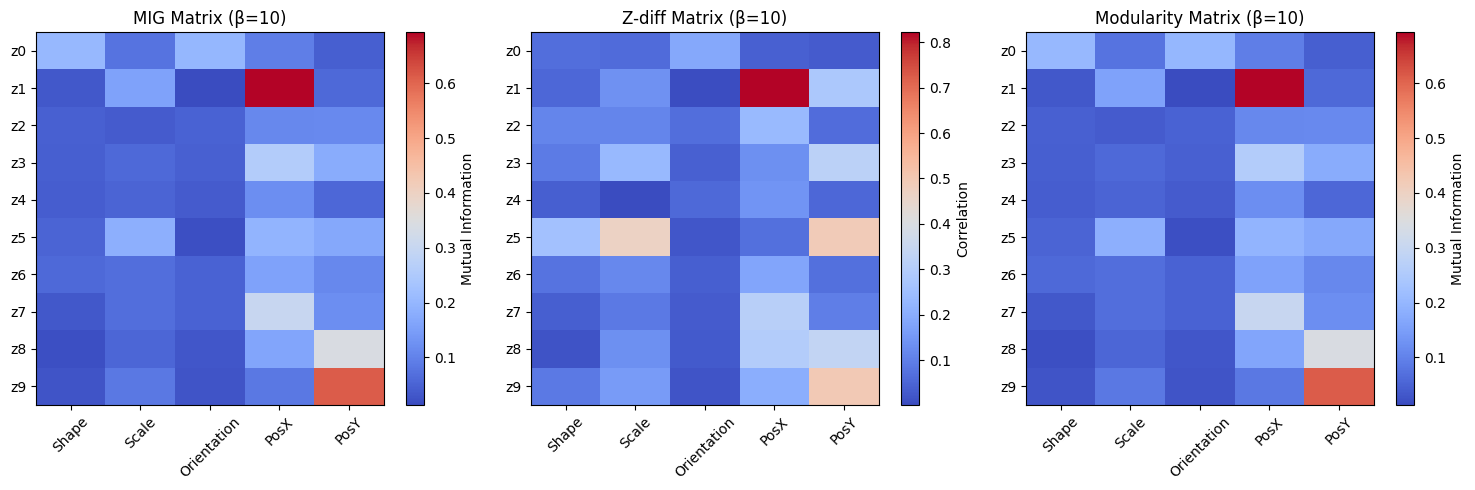


Summary of Disentanglement Metrics:

β Value | MIG Score | Z-diff Score | Modularity Score
-------------------------------------------------------
    0.5 |    0.1844 |      0.4063 |          0.6956
    1.0 |    0.4547 |      0.3570 |          0.7087
    2.5 |    0.3448 |      0.3219 |          0.6867
    5.0 |    0.3391 |      0.3774 |          0.6628
    7.5 |    0.2720 |      0.3717 |          0.6749
   10.0 |    0.5224 |      0.3523 |          0.6642
   50.0 |    0.0000 |         nan |          0.0000


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt


def compute_mig_score(latents, factors, num_bins=20):
    """
    Compute Mutual Information Gap score
    """
    # Reshape factors if 1D
    if len(factors.shape) == 1:
        factors = factors.reshape(-1, 1)

    # Discretize continuous latents and factors
    latents_discrete = StandardScaler().fit_transform(latents)
    latents_discrete = np.digitize(latents_discrete, np.linspace(-3, 3, num_bins))

    factors_discrete = StandardScaler().fit_transform(factors)
    factors_discrete = np.digitize(factors_discrete, np.linspace(-3, 3, num_bins))

    # Compute mutual information between each latent and factor
    mi_matrix = np.zeros((latents.shape[1], factors.shape[1]))
    for i in range(latents.shape[1]):
        for j in range(factors.shape[1]):
            mi_matrix[i, j] = mutual_info_score(latents_discrete[:, i], factors_discrete[:, j])

    # Compute MIG score
    sorted_mi = np.sort(mi_matrix, axis=0)
    mig = np.mean((sorted_mi[-1] - sorted_mi[-2]) / (sorted_mi[-1] + 1e-10))

    return mig, mi_matrix

def compute_z_diff_score(latents, factors, num_pairs=1000):
    """
    Compute Z-diff score
    """
    # Reshape factors if 1D
    if len(factors.shape) == 1:
        factors = factors.reshape(-1, 1)

    # Generate random pairs
    num_samples = len(latents)
    pair_indices = np.random.choice(num_samples, size=(num_pairs, 2), replace=True)

    # Calculate differences
    latent_diffs = latents[pair_indices[:, 0]] - latents[pair_indices[:, 1]]
    factor_diffs = factors[pair_indices[:, 0]] - factors[pair_indices[:, 1]]

    # Normalize differences
    latent_diffs = StandardScaler().fit_transform(latent_diffs)
    factor_diffs = StandardScaler().fit_transform(factor_diffs)

    # Compute correlation matrix
    z_diff_matrix = np.abs(np.corrcoef(latent_diffs.T, factor_diffs.T)[:latents.shape[1], -factors.shape[1]:])

    # Compute score: average of maximum correlations
    z_diff_score = np.mean(np.max(z_diff_matrix, axis=1))

    return z_diff_score, z_diff_matrix

def compute_modularity_score(latents, factors, num_bins=20):
    """
    Compute Modularity Score
    """
    # Reshape factors if 1D
    if len(factors.shape) == 1:
        factors = factors.reshape(-1, 1)

    # Discretize
    latents_discrete = StandardScaler().fit_transform(latents)
    latents_discrete = np.digitize(latents_discrete, np.linspace(-3, 3, num_bins))

    factors_discrete = StandardScaler().fit_transform(factors)
    factors_discrete = np.digitize(factors_discrete, np.linspace(-3, 3, num_bins))

    # Compute mutual information matrix
    mi_matrix = np.zeros((latents.shape[1], factors.shape[1]))
    for i in range(latents.shape[1]):
        for j in range(factors.shape[1]):
            mi_matrix[i, j] = mutual_info_score(latents_discrete[:, i], factors_discrete[:, j])

    # Compute modularity
    modularity = 0
    for i in range(latents.shape[1]):
        max_mi = np.max(mi_matrix[i])
        if max_mi > 0:  # Avoid division by zero
            modularity += 1 - (np.sum(mi_matrix[i]) - max_mi) / (factors.shape[1] - 1) / max_mi

    return modularity / latents.shape[1], mi_matrix

def compute_metrics(model, dataset, num_samples=10000):
    """
    Compute all disentanglement metrics for a model
    """
    model.eval()
    with torch.no_grad():
        # Sample indices
        indices = np.random.choice(len(dataset), num_samples, replace=False)
        latents = []
        factors = []

        # Collect latents and factors
        for idx in tqdm(indices, desc="Collecting samples"):
            img, factor = dataset[idx]
            mu, _ = model.encoder(img.unsqueeze(0).to(device))
            latents.append(mu.cpu().numpy()[0])
            factors.append(factor.numpy())  # Convert torch tensor to numpy

        latents = np.array(latents)
        factors = np.array(factors)

        # Normalize factors to [0,1] range
        factors = (factors - factors.min(axis=0)) / (factors.max(axis=0) - factors.min(axis=0))

        # Compute all metrics
        mig_score, mig_matrix = compute_mig_score(latents, factors)
        z_diff_score, z_diff_matrix = compute_z_diff_score(latents, factors)
        mod_score, mod_matrix = compute_modularity_score(latents, factors)

        return {
            'mig': mig_score,
            'z_diff': z_diff_score,
            'modularity': mod_score,
            'matrices': {
                'mig': mig_matrix,
                'z_diff': z_diff_matrix,
                'modularity': mod_matrix
            }
        }

def plot_metrics(metrics_results, betas):
    """
    Plot all metrics
    """
    plt.figure(figsize=(15, 5))

    # Extract metrics
    mig_scores = [metrics_results[beta]['mig'] for beta in betas]
    z_diff_scores = [metrics_results[beta]['z_diff'] for beta in betas]
    mod_scores = [metrics_results[beta]['modularity'] for beta in betas]

    # Plot MIG scores
    plt.subplot(1, 3, 1)
    plt.plot(betas, mig_scores, 'o-')
    plt.axvline(x=1, color='r', linestyle='--', label='Baseline (β=1)')
    plt.xlabel('β Value')
    plt.ylabel('MIG Score')
    plt.title('Mutual Information Gap (MIG)')
    plt.grid(True)
    plt.legend()

    # Plot Z-diff scores
    plt.subplot(1, 3, 2)
    plt.plot(betas, z_diff_scores, 'o-')
    plt.axvline(x=1, color='r', linestyle='--', label='Baseline (β=1)')
    plt.xlabel('β Value')
    plt.ylabel('Z-diff Score')
    plt.title('Z-diff Score')
    plt.grid(True)
    plt.legend()

    # Plot Modularity scores
    plt.subplot(1, 3, 3)
    plt.plot(betas, mod_scores, 'o-')
    plt.axvline(x=1, color='r', linestyle='--', label='Baseline (β=1)')
    plt.xlabel('β Value')
    plt.ylabel('Modularity Score')
    plt.title('Modularity Score')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# The compute_mig_score, compute_z_diff_score, and compute_modularity_score functions can remain the same

def plot_correlation_matrices(metrics_results, beta, factor_names=None):
    """
    Plot correlation matrices for a specific beta value
    """
    if factor_names is None:
        factor_names = ['Shape', 'Scale', 'Orientation', 'PosX', 'PosY']  # DSprites factors

    latent_names = ['z' + str(i) for i in range(metrics_results[beta]['matrices']['mig'].shape[0])]

    plt.figure(figsize=(15, 5))

    # Plot MIG matrix
    plt.subplot(1, 3, 1)
    plt.imshow(metrics_results[beta]['matrices']['mig'], cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Mutual Information')
    plt.xticks(range(len(factor_names)), factor_names, rotation=45)
    plt.yticks(range(len(latent_names)), latent_names)
    plt.title(f'MIG Matrix (β={beta})')

    # Plot Z-diff matrix
    plt.subplot(1, 3, 2)
    plt.imshow(metrics_results[beta]['matrices']['z_diff'], cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Correlation')
    plt.xticks(range(len(factor_names)), factor_names, rotation=45)
    plt.yticks(range(len(latent_names)), latent_names)
    plt.title(f'Z-diff Matrix (β={beta})')

    # Plot Modularity matrix
    plt.subplot(1, 3, 3)
    plt.imshow(metrics_results[beta]['matrices']['modularity'], cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Mutual Information')
    plt.xticks(range(len(factor_names)), factor_names, rotation=45)
    plt.yticks(range(len(latent_names)), latent_names)
    plt.title(f'Modularity Matrix (β={beta})')

    plt.tight_layout()
    plt.show()

# Rest of the code can remain the same

# Compute metrics for all models
metrics_results = {}
for beta in tqdm(betas, desc="Computing metrics for different beta values"):
    print(f"\nComputing metrics for β = {beta}")
    metrics_results[beta] = compute_metrics(trained_models[beta], dataset)

# Plot results
plot_metrics(metrics_results, betas)

# Plot correlation matrices for baseline and best beta
print("\nBaseline (β=1) correlation matrices:")
plot_correlation_matrices(metrics_results, 1.0)

# Find best beta based on average of normalized metrics
best_beta = max(betas, key=lambda b: (
    metrics_results[b]['mig'] +
    metrics_results[b]['z_diff'] +
    metrics_results[b]['modularity']
) / 3)

print(f"\nBest performing model (β={best_beta}) correlation matrices:")
plot_correlation_matrices(metrics_results, best_beta)

# Print summary table
print("\nSummary of Disentanglement Metrics:")
print("\nβ Value | MIG Score | Z-diff Score | Modularity Score")
print("-" * 55)
for beta in betas:
    print(f"{beta:7.1f} | {metrics_results[beta]['mig']:9.4f} | "
          f"{metrics_results[beta]['z_diff']:11.4f} | "
          f"{metrics_results[beta]['modularity']:15.4f}")